In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEmodb_Ek_new.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [3]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [4]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

17/17 [==============================] - 0s 2ms/step


In [5]:
print(gender_predictions)

[[5.3914841e-02]
 [2.7344990e-04]
 [2.8685003e-03]
 [5.4774457e-03]
 [3.7811184e-04]
 [1.0176876e-03]
 [4.2065262e-04]
 [5.4871949e-04]
 [6.4877611e-01]
 [3.4983151e-03]
 [1.2081929e-03]
 [6.5318710e-04]
 [1.7036605e-03]
 [3.1155697e-03]
 [2.2163147e-02]
 [9.7968860e-04]
 [8.3286525e-04]
 [1.1550989e-03]
 [1.0704088e-03]
 [9.9626166e-01]
 [4.2972350e-04]
 [4.3027862e-03]
 [2.1547864e-01]
 [2.5862953e-04]
 [2.3637460e-04]
 [1.8480223e-03]
 [1.0041273e-03]
 [6.6287938e-04]
 [1.1812864e-03]
 [3.2756152e-04]
 [4.8196479e-04]
 [1.1076912e-02]
 [1.6184397e-03]
 [7.2550477e-04]
 [1.2340237e-02]
 [2.8029407e-04]
 [6.6080788e-04]
 [8.5476867e-04]
 [3.7037355e-03]
 [1.6264275e-03]
 [4.0304218e-04]
 [1.4188240e-03]
 [5.0482724e-04]
 [1.3442766e-02]
 [9.8911917e-04]
 [2.2824713e-04]
 [1.3678925e-03]
 [9.5574238e-04]
 [3.3694410e-03]
 [9.9811941e-01]
 [9.9871039e-01]
 [9.9928093e-01]
 [9.9837577e-01]
 [9.9949455e-01]
 [9.9489617e-01]
 [9.9989474e-01]
 [9.9954426e-01]
 [9.9913985e-01]
 [9.9765438e-0

In [6]:
male_rows = gender_predictions.flatten() >= 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} female samples.")

Filtered dataset contains 305 female samples.


In [3]:
df = data

In [4]:
df.shape

(535, 196)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [9]:
data.iloc[:,-3] == 1 #male

0      False
1      False
2      False
3      False
4      False
       ...  
530     True
531     True
532     True
533     True
534     True
Name: gender, Length: 535, dtype: bool

In [6]:
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,14.751010,17.490223,16.878034,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,14.512919,17.550766,19.076122,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,16.131910,18.237524,19.299087,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,15.816742,17.617843,17.377833,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,14.601713,14.795569,19.625183,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,16.838569,17.835524,19.693569,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,15.286078,17.031323,18.757498,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,14.402789,15.672307,17.590725,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,19.920409,19.619588,21.609127,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701


In [8]:
y

0      6
1      3
2      1
3      6
4      3
      ..
530    2
531    7
532    7
533    1
534    1
Name: emo, Length: 535, dtype: int64

In [9]:
X.shape, y.shape

((535, 193), (535,))

In [10]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [11]:
y1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
X.shape, y1.shape

((535, 193), (535, 7))

In [13]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [14]:
X2.shape, y2.shape

((535, 193), (535,))

In [16]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [17]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [19]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,14.751010,17.490223,16.878034,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,14.512919,17.550766,19.076122,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,16.131910,18.237524,19.299087,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,15.816742,17.617843,17.377833,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,14.601713,14.795569,19.625183,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,16.838569,17.835524,19.693569,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,15.286078,17.031323,18.757498,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,14.402789,15.672307,17.590725,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,19.920409,19.619588,21.609127,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701


In [20]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=535
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    #print(a[i])

    model_name = 'Model_'+str(i)
    savedir='Emodb_gender_both'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Training set: 4 folds (80%)
    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    # Testing set: 1 fold (20%)
    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]


    overlap_indices = np.intersect1d(split4, split1)
    if len(overlap_indices) > 0:
        print(f"⚠️ Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"✅ No overlap in fold {i}.")

    print(f"Fold {i} -> Train samples: {len(split4)}, Test samples: {len(split1)}")

    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs_train = y.iloc[split4]
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print(fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

✅ No overlap in fold 0.
Fold 0 -> Train samples: 428, Test samples: 107
[ 56   4   0  11   1   3   2  96  21   7   9  10 155  18 108 126 182 149
 145 125 133  68  79  27  39  23  44  31  25 107  14  88  15  78 123 104
 151 148 172 185 120 122  61  57  80  86  76  42  53 100 131 116 171 160
 124  62  49  19  16  55 109 113 117 170 164 168 138 142 128 121 136 132
 152 163 186 184 174 176 156 154 166 173 183 147 161 157 127  47  58  87
  22  40  90  37  92  69 181 143 119  98  43  66  81  65  45  36  24  52
  67  72  93  64  38  63  60  46  35  51  75  70  71 105  99  95  89]
0
Epoch 1/700
14/14 [==============================] - 5s 161ms/step - loss: 1.8537 - accuracy: 0.2757 - val_loss: 1.8272 - val_accuracy: 0.2056
Epoch 2/700
14/14 [==============================] - 1s 100ms/step - loss: 1.5099 - accuracy: 0.3925 - val_loss: 1.7559 - val_accuracy: 0.2897
Epoch 3/700
14/14 [==============================] - 1s 99ms/step - loss: 1.4160 - accuracy: 0.5000 - val_loss: 1.7301 - val_accurac

In [ ]:
### scores

In [34]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

3.237603783607483 0.6475207567214966


In [47]:
scores

[[1.4199223518371582, 0.4655172526836395],
 [1.3555432558059692, 0.5245901346206665],
 [1.0535591840744019, 0.6811594367027283],
 [1.3914963006973267, 0.47887325286865234],
 [1.317863941192627, 0.5116279125213623]]

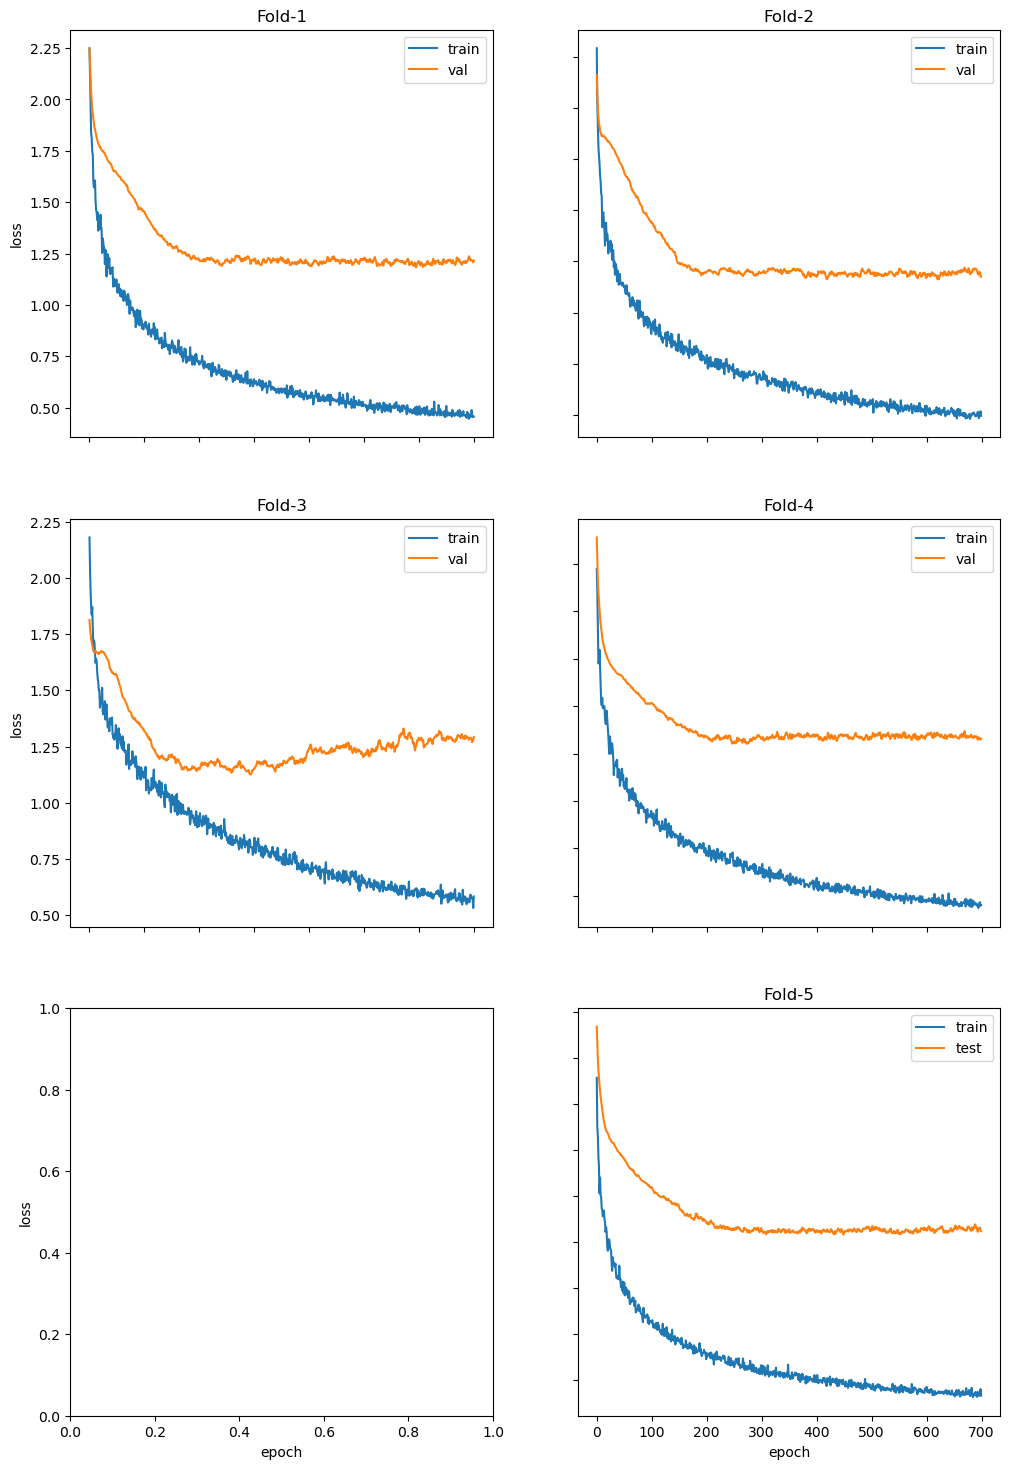

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [ ]:
### Model yükleme, gereksizse yapma

In [1]:
# loading json and creating model
from keras.models import model_from_json
savedir='Emodb_gender_both'
m='Model_3' # Infact female

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loaded model from disk


Testing data from the same pool

In [2]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X3.npy')
yloaded=np.load(savedir+'/y3.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 78.50%


In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

4/4 [==============================] - 0s 21ms/step
(107, 7)
107


array([[29,  0,  0,  0,  0,  2,  0],
       [ 0,  9,  2,  0,  0,  0,  0],
       [ 0,  6, 12,  1,  0,  0,  0],
       [ 1,  1,  1,  6,  1,  0,  0],
       [ 0,  0,  1,  0, 12,  0,  0],
       [ 2,  0,  0,  2,  2,  7,  0],
       [ 0,  1,  0,  0,  0,  0,  9]], dtype=int64)

In [4]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[93.5  0.   0.   0.   0.   6.5  0. ]
 [ 0.  81.8 18.2  0.   0.   0.   0. ]
 [ 0.  31.6 63.2  5.3  0.   0.   0. ]
 [10.  10.  10.  60.  10.   0.   0. ]
 [ 0.   0.   7.7  0.  92.3  0.   0. ]
 [15.4  0.   0.  15.4 15.4 53.8  0. ]
 [ 0.  10.   0.   0.   0.   0.  90. ]]


         angry  bored  neutral  disgust  fear  happy   sad
angry     93.5    0.0      0.0      0.0   0.0    6.5   0.0
bored      0.0   81.8     18.2      0.0   0.0    0.0   0.0
neutral    0.0   31.6     63.2      5.3   0.0    0.0   0.0
disgust   10.0   10.0     10.0     60.0  10.0    0.0   0.0
fear       0.0    0.0      7.7      0.0  92.3    0.0   0.0
happy     15.4    0.0      0.0     15.4  15.4   53.8   0.0
sad        0.0   10.0      0.0      0.0   0.0    0.0  90.0



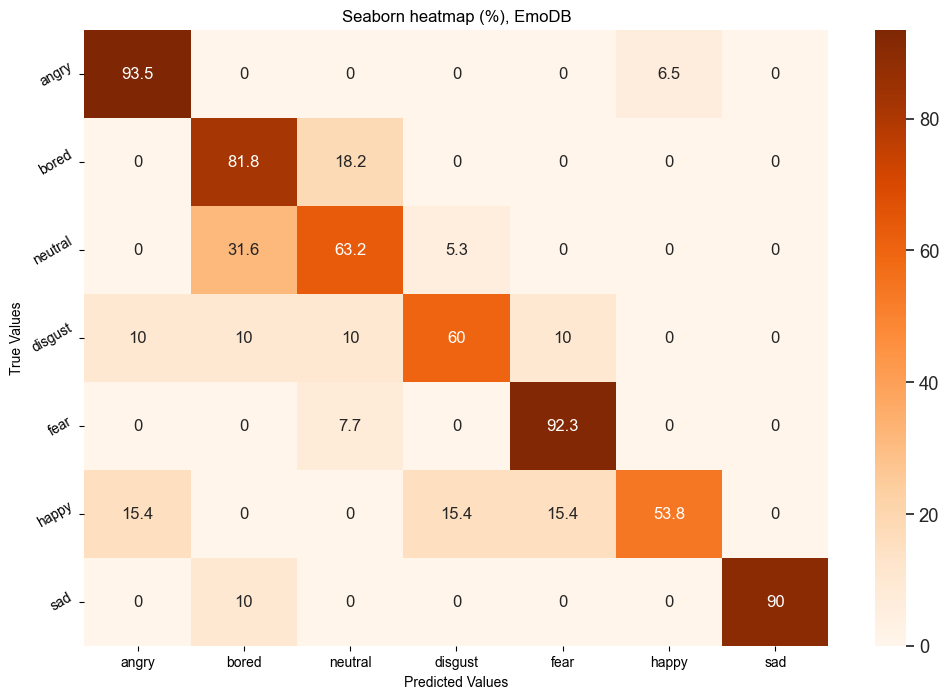

In [5]:
listik = ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), EmoDB')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()